In [1]:
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight','ggplot'])
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
#Using the Boston house price dataset: http://lib.stat.cmu.edu/datasets/boston

# 1) What are the ethical problems associated with the Boston house price dataset? 
# 2) Accordingly, which one of the following features are you going to exclude from the dataset and analysis?
# 3) Please think critically and reflect to inform your future practice.

#There are 14 attributes in each case of the dataset. They are:
#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's


df_data = pd.read_csv('lab3_data.csv')

In [3]:
df_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
feature_cols = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

In [5]:
X = df_data[feature_cols]
y = df_data['chas'] #use for a classification task

X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: chas, dtype: int64

# Decision Tree

In [6]:
from sklearn import tree, ensemble

In [7]:
np.random.seed(48)
clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_depth=3))
accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")
print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_depth = 3:  86.77344205008737 %


In [8]:
np.random.seed(48)
clf_dt = make_pipeline(tree.DecisionTreeClassifier(max_depth=3))
accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")
print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_depth = 3:  86.77344205008737 %


**Think 1: why does feature scaling not affect the results? Write down you thoughts:** 

[Your thoughts]: 
Feature scaling does not affect the results due to the inherent properties of Decision Tree algorithms, which are not sensitive to the magnitude of features. Regardless of whether we apply StandardScaler or not, the Decision Tree determines splits based on the inherent order of the data points, not their specific numerical values. Thus, scaling doesn’t impact the decisions made by the tree about where to split the data, explaining the consistent accuracy of 86.77344205008737% in both scaled and non-scaled scenarios in this specific instance.

In [9]:
np.random.seed(48)
clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_leaf_nodes=8))
accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")
print("Average Accuracy when max_leaf_nodes = 8: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_leaf_nodes = 8:  82.99747621821005 %


In [10]:
# Go through different max_depth

results_list = []
for depth in range(1,20,1):
    np.random.seed(48)
    clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_depth=depth))
    accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")
    results_list.append([depth, 100 * np.mean(accuracy_results)])
df_results_list_dt = pd.DataFrame(results_list, columns=["Max_Depth", "Acc"])

Text(0, 0.5, 'Accuracy / %')

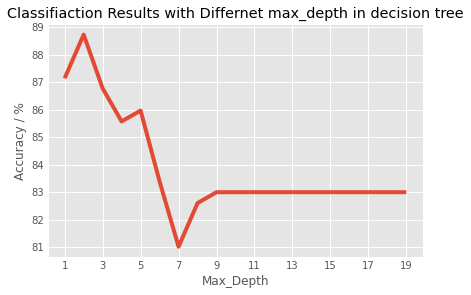

In [11]:
# Visualization

fig, ax = plt.subplots()
df_results_list_dt.set_index("Max_Depth")["Acc"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet max_depth in decision tree")
ax.set_xticks(list(range(1,20,2)))
ax.set_ylabel("Accuracy / %")

## TODO 1: Try with different max_leaf_nodes (from 2 to 20). Plot the results (x: max_leaf_nodes, y : classification accuracy)

In [12]:
results_list = []

for max_leaf_nodes in range(2, 21):
    np.random.seed(48)
    clf_dt = make_pipeline(
        StandardScaler(),
        tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    )
    
    accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring="accuracy")
    results_list.append([max_leaf_nodes, 100 * np.mean(accuracy_results)])

df_results = pd.DataFrame(results_list, columns=["Max_Leaf_Nodes", "Accuracy"])

Text(0, 0.5, 'Accuracy / %')

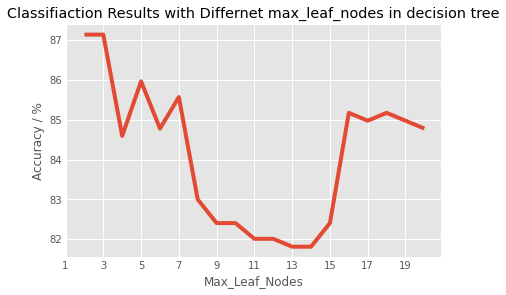

In [13]:
# Visualization

fig, ax = plt.subplots()
df_results.set_index("Max_Leaf_Nodes")["Accuracy"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet max_leaf_nodes in decision tree")
ax.set_xticks(list(range(1,20,2)))
ax.set_ylabel("Accuracy / %")

# Ensemble Learning

## Random Forest

In [14]:
np.random.seed(48)
n_estimator = 3
depth = 3
clf_rf = ensemble.RandomForestClassifier(
    n_estimators= n_estimator,
    max_depth = depth)
accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring = "accuracy")
print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_depth = 3:  85.16210444573869 %


In [15]:
np.random.seed(48)
n_estimator = 100
depth = 3
clf_rf = ensemble.RandomForestClassifier(
    n_estimators= n_estimator,
    max_depth = depth)
accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring = "accuracy")
print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_depth = 3:  88.13240147544165 %


In [16]:
# Go through different n_estimator

results_list = []
for n_estimator in range(5,55,5):
    np.random.seed(100)
    depth = 3
    clf_rf = ensemble.RandomForestClassifier(
        n_estimators= n_estimator,
        max_depth = depth)
    accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring = "accuracy")
    results_list.append([n_estimator, 100 * np.mean(accuracy_results)])
df_results_list_rf = pd.DataFrame(results_list, columns=["n_estimator", "Acc"])

Text(0, 0.5, 'Accuracy / %')

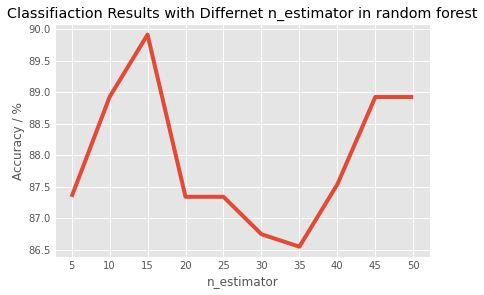

In [17]:
# Visualization

fig, ax = plt.subplots()
df_results_list_rf.set_index("n_estimator")["Acc"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet n_estimator in random forest")
ax.set_xticks(list(range(5,55,5)))
ax.set_ylabel("Accuracy / %")

## Adaboost

In [18]:
# Go through different n_estimator

results_list = []
for n_estimator in range(5,55,5):
    np.random.seed(100)
    depth = 3
    clf_adaboost = ensemble.AdaBoostClassifier(n_estimators = n_estimator,
                                                  base_estimator = tree.DecisionTreeClassifier(
                                                      max_depth= depth))
    accuracy_results = cross_val_score(clf_adaboost, X, y, cv=5, scoring = "accuracy")
    results_list.append([n_estimator, 100 * np.mean(accuracy_results)])
    
df_results_list_adaboost = pd.DataFrame(results_list, columns=["n_estimator", "Acc"])

Text(0, 0.5, 'Accuracy / %')

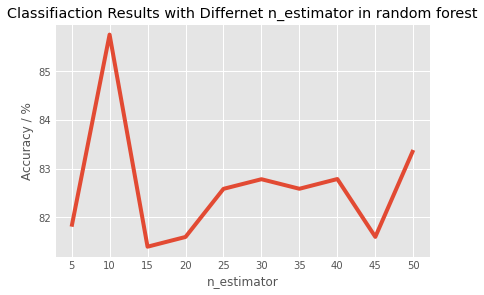

In [19]:
# Visualization

fig, ax = plt.subplots()
df_results_list_adaboost.set_index("n_estimator")["Acc"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet n_estimator in random forest")
ax.set_xticks(list(range(5,55,5)))
ax.set_ylabel("Accuracy / %")

# Method 1

# TODO 2: Try with more hyperparameters in random forest models (n_estimator, max_depth/max_leaf_node of each tree). Write down your observation.

In [20]:
results_list = []
for depth in range(1, 21):
    n_estimator = 4
    np.random.seed(100)
    clf_rf = ensemble.RandomForestClassifier(
        n_estimators= n_estimator,
        max_depth = depth)
    accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring = "accuracy")
    results_list.append([depth, 100 * np.mean(accuracy_results)])
df_results_list_rf = pd.DataFrame(results_list, columns=["depth", "Acc"])

Text(0, 0.5, 'Accuracy / %')

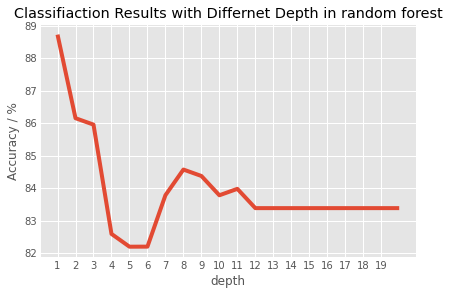

In [21]:
# Visualization
fig, ax = plt.subplots()
df_results_list_rf.set_index("depth")["Acc"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet Depth in random forest")
ax.set_xticks(list(range(1,20,1)))
ax.set_ylabel("Accuracy / %")

In [22]:
results_list = []
for max_leaf_nodes in range(2, 21):
    n_estimator = 4
    np.random.seed(100)
    clf_rf = ensemble.RandomForestClassifier(
        n_estimators=n_estimator,
        max_leaf_nodes=max_leaf_nodes
    )
    accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring="accuracy")
    results_list.append([max_leaf_nodes, 100 * np.mean(accuracy_results)])
df_results_list_rf = pd.DataFrame(results_list, columns=["max_leaf_nodes", "Acc"])

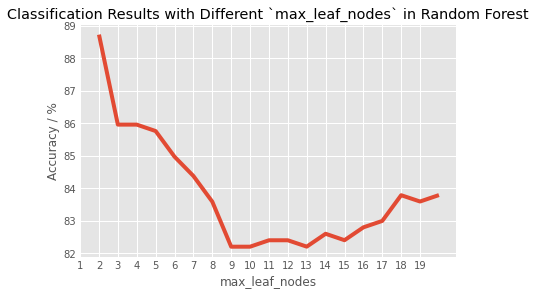

In [23]:
fig, ax = plt.subplots()
df_results_list_rf.set_index("max_leaf_nodes")["Acc"].plot(ax=ax)
ax.set_title("Classification Results with Different `max_leaf_nodes` in Random Forest")
ax.set_xticks(list(range(1,20,1)))
ax.set_ylabel("Accuracy / %")
plt.show()

（1）The first image illustrates the classification accuracy of a Random Forest with varying tree depths (depth). The x-axis represents the depth of the tree, and the y-axis represents the classification accuracy percentage. This graph illustrates the accuracy of the Random Forest classifier at various tree depths. From the graph, it's evident that the accuracy dramatically decreases in the initial stages as the depth increases and then remains relatively stable. This might imply that after reaching a certain depth, further increasing the depth doesn't significantly enhance the model's performance and might even lead to overfitting.

（2）The second image shows the classification accuracy of a Random Forest with different max_leaf_nodes settings. The x-axis represents the maximum number of leaf nodes, and the y-axis displays the classification accuracy percentage. This graph displays the accuracy of the Random Forest classifier with different settings for the maximum number of leaf nodes. The accuracy initially decreases as the number of leaf nodes increases, reaches a minimum point at a certain value, and then rises again as the number of leaf nodes continues to increase. This suggests that there's an optimal number of leaf nodes, and having too few or too many leaf nodes might affect the overall performance of the model.

# TODO 3: Try with more hyperparameters in Adaboost models (n_estimator, max_depth/max_leaf_node of each tree). Write down your observation.

In [24]:
# Go through different n_estimator and depth is 6

results_list = []
for n_estimator in range(10,100,10):
    np.random.seed(100)
    depth = 6
    clf_adaboost = ensemble.AdaBoostClassifier(n_estimators = n_estimator,
                                                  base_estimator = tree.DecisionTreeClassifier(
                                                      max_depth= depth))
    accuracy_results = cross_val_score(clf_adaboost, X, y, cv=5, scoring = "accuracy")
    results_list.append([n_estimator, 100 * np.mean(accuracy_results)])
    
df_results_list_adaboost = pd.DataFrame(results_list, columns=["n_estimator", "Acc"])

Text(0, 0.5, 'Accuracy / %')

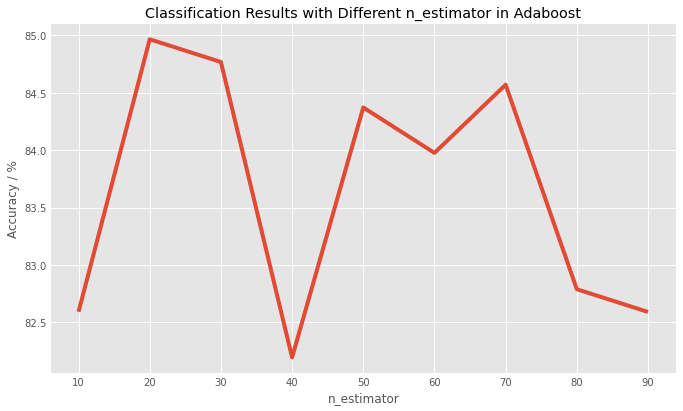

In [25]:
# Visualization
fig, ax = plt.subplots(figsize=(10,6))
df_results_list_adaboost.set_index("n_estimator")["Acc"].plot(ax=ax)
ax.set_title("Classification Results with Different n_estimator in Adaboost")
ax.set_xticks(list(range(10,100,10)))
ax.set_ylabel("Accuracy / %")

In [26]:
# Go through different n_estimator and max_leaf_nodes is 6

results_list = []
for n_estimator in range(10,100,10):
    np.random.seed(100)
    max_leaf_nodes = 6
    clf_adaboost = ensemble.AdaBoostClassifier(n_estimators = n_estimator,
                                                  base_estimator = tree.DecisionTreeClassifier(
                                                      max_leaf_nodes= max_leaf_nodes))
    accuracy_results = cross_val_score(clf_adaboost, X, y, cv=5, scoring = "accuracy")
    results_list.append([n_estimator, 100 * np.mean(accuracy_results)])
    
df_results_list_adaboost = pd.DataFrame(results_list, columns=["n_estimator", "Acc"])

Text(0, 0.5, 'Accuracy / %')

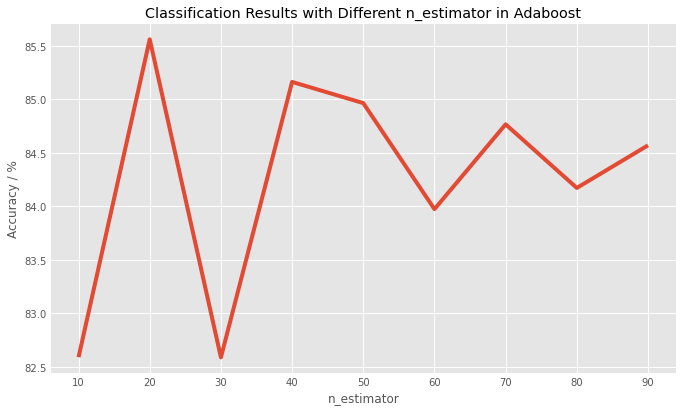

In [27]:
# Visualization

fig, ax = plt.subplots(figsize=(10,6))
df_results_list_adaboost.set_index("n_estimator")["Acc"].plot(ax=ax)
ax.set_title("Classification Results with Different n_estimator in Adaboost")
ax.set_xticks(list(range(10,100,10)))
ax.set_ylabel("Accuracy / %")

First Graph (Classification Results with Different n_estimator in Adaboost):
From the first graph, the relationship between the number of estimators (n_estimator) and the model's accuracy can be observed.The highest accuracy is observed around the 20-25 mark, after which it again shows a declining trend before stabilizing and slightly improving towards the end. This suggests that while increasing the number of estimators can improve accuracy, there is a threshold after which the improvements might not be as significant or could even deteriorate.

Second Graph (Classification Results with Different n_estimator in Adaboost):
The second graph exhibits a similar trend to the first, although the fluctuations in accuracy are more pronounced. The graph shows a sharp increase in accuracy in the initial stages, peaking near the 15-20 estimator range, then a significant decline, followed by a series of peaks and valleys. A subsequent rise in accuracy is noticeable around the 60-70 estimator range. This erratic behavior suggests that there might be other hyperparameters or factors affecting the model's performance, and a careful selection of n_estimator is essential. One observation is that even with higher numbers of estimators, the accuracy can fluctuate, which implies the necessity of optimizing other parameters in tandem with n_estimator for achieving the best results.

-------------

# Method 2

# TODO 2: Try with more hyperparameters in random forest models (n_estimator, max_depth/max_leaf_node of each tree). Write down your observation.

In [28]:
results_list = []

In [29]:
for n_estimator in range(10, 100, 10):
    for depth in range(1, 11):
        np.random.seed(48)
        clf_rf = ensemble.RandomForestClassifier(
            n_estimators=n_estimator,
            max_depth=depth
        )
        accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring="accuracy")
        results_list.append([n_estimator, depth, None, 100 * np.mean(accuracy_results)])

In [30]:
for n_estimator in range(10, 100, 10):
    for max_leaf_nodes in range(2, 21, 2):
        np.random.seed(48)
        clf_rf = ensemble.RandomForestClassifier(
            n_estimators=n_estimator,
            max_leaf_nodes=max_leaf_nodes
        )
        accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring="accuracy")
        results_list.append([n_estimator, None, max_leaf_nodes, 100 * np.mean(accuracy_results)])

In [31]:
df_results = pd.DataFrame(results_list, columns=["n_estimator", "max_depth", "max_leaf_nodes", "Acc"])

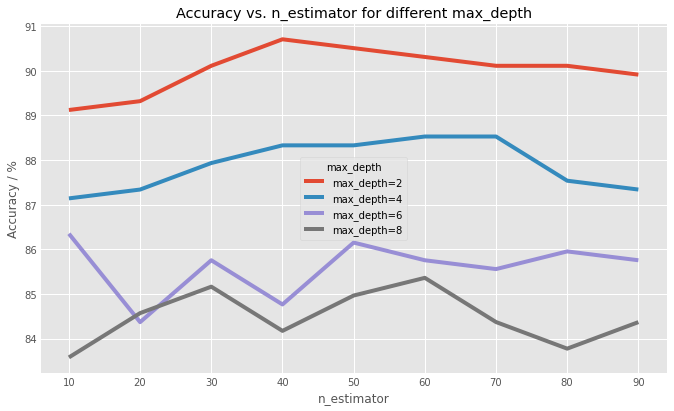

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
for depth in range(2, 10, 2):
    subset = df_results[(df_results['max_depth'] == depth) & df_results['max_leaf_nodes'].isna()]
    ax.plot(subset['n_estimator'], subset['Acc'], label=f'max_depth={depth}')

ax.set_title("Accuracy vs. n_estimator for different max_depth")
ax.set_xlabel("n_estimator")
ax.set_ylabel("Accuracy / %")
ax.legend(title='max_depth')
ax.grid(True)
plt.show()

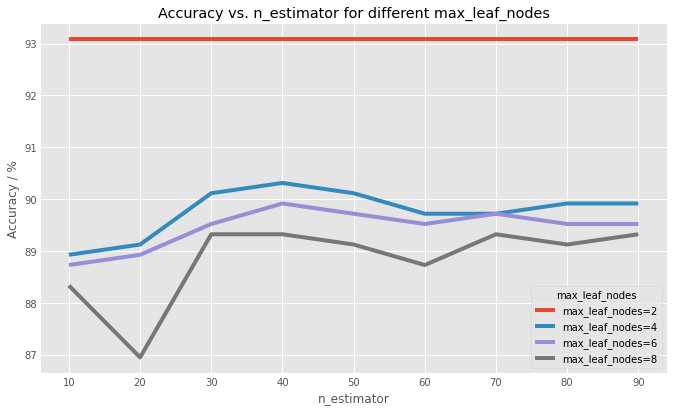

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
for max_leaf_nodes in range(2, 10, 2):
    subset = df_results[(df_results['max_leaf_nodes'] == max_leaf_nodes) & df_results['max_depth'].isna()]
    ax.plot(subset['n_estimator'], subset['Acc'],label=f'max_leaf_nodes={max_leaf_nodes}')

ax.set_title("Accuracy vs. n_estimator for different max_leaf_nodes")
ax.set_xlabel("n_estimator")
ax.set_ylabel("Accuracy / %")
ax.legend(title='max_leaf_nodes')
ax.grid(True)
plt.show()

**Accuracy vs. n_estimator for different max_depth:**
The first plot indicates that the choice of max_depth greatly affects accuracy. A max_depth of 2 gives the highest accuracy among the depicted depths, suggesting that a simpler model (with shallower trees) works best for this particular dataset. However, increasing max_depth beyond 2 results in a decrease in accuracy. This can indicate overfitting as the trees might be getting too specific for the training data and not generalizing well to the validation set.

**Accuracy vs. n_estimator for different max_leaf_nodes:**
There's a more varied performance trend based on the max_leaf_nodes hyperparameter compared to the max_depth hyperparameter. The accuracy seems to be the highest with max_leaf_nodes set to 2, while there are some fluctuations in accuracy with increasing max_leaf_nodes. For max_leaf_nodes of 2, there's a clear stabilization in accuracy as the number of trees (n_estimator) increases. However, for higher max_leaf_nodes values, there are more fluctuations in accuracy across different n_estimators.

# TODO 3: Try with more hyperparameters in Adaboost models (n_estimator, max_depth/max_leaf_node of each tree). Write down your observation.

In [34]:
results_list = []

In [35]:
for n_estimator in range(10, 100, 10):
    for depth in range(1, 20, 2):
        np.random.seed(100)
        clf_adaboost = ensemble.AdaBoostClassifier(n_estimators = n_estimator,
                                                  base_estimator = tree.DecisionTreeClassifier(
                                                      max_depth= depth))
        accuracy_results = cross_val_score(clf_adaboost, X, y, cv=5, scoring = "accuracy")
        results_list.append([n_estimator, depth, None, 100 * np.mean(accuracy_results)])

In [36]:
for n_estimator in range(10, 100, 10):
    for max_leaf_nodes in range(2, 21, 2):
        np.random.seed(100)
        clf_adaboost = ensemble.AdaBoostClassifier(n_estimators = n_estimator,
                                                  base_estimator = tree.DecisionTreeClassifier(
                                                      max_depth= max_leaf_nodes))
        accuracy_results = cross_val_score(clf_adaboost, X, y, cv=5, scoring = "accuracy")
        results_list.append([n_estimator, None, max_leaf_nodes, 100 * np.mean(accuracy_results)])

In [37]:
df_results_list_adaboost = pd.DataFrame(results_list, columns= ["n_estimator", "max_depth", "max_leaf_nodes", "Acc"])

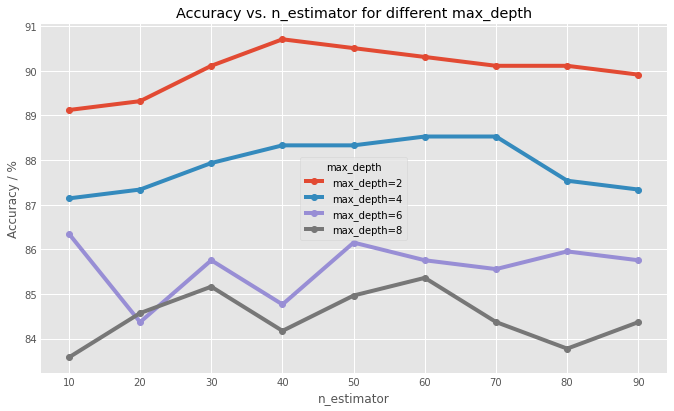

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
for depth in range(2, 10, 2):
    subset = df_results[(df_results['max_depth'] == depth) & df_results['max_leaf_nodes'].isna()]
    ax.plot(subset['n_estimator'], subset['Acc'], marker='o', linestyle='-', label=f'max_depth={depth}')

ax.set_title("Accuracy vs. n_estimator for different max_depth")
ax.set_xlabel("n_estimator")
ax.set_ylabel("Accuracy / %")
ax.legend(title='max_depth')
ax.grid(True)
plt.show()

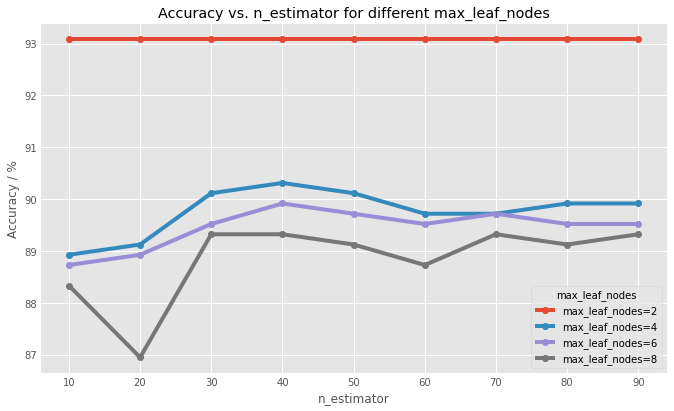

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
for max_leaf_nodes in range(2, 10, 2):
    subset = df_results[(df_results['max_leaf_nodes'] == max_leaf_nodes) & df_results['max_depth'].isna()]
    ax.plot(subset['n_estimator'], subset['Acc'], marker='o', linestyle='-', label=f'max_leaf_nodes={max_leaf_nodes}')

ax.set_title("Accuracy vs. n_estimator for different max_leaf_nodes")
ax.set_xlabel("n_estimator")
ax.set_ylabel("Accuracy / %")
ax.legend(title='max_leaf_nodes')
ax.grid(True)
plt.show()

Trees with a max_depth or max_leaf_code of 2 seem to be the most robust in terms of accuracy across different n_estimators. Trees with max_leaf_nodes or max_depth set to 2 have impressively stable accuracy across varying n_estimators. As the complexity of the trees increases (either by depth or leaf nodes), there's increased variability in the accuracy trends. For most configurations, when the max_leaf_nodes or max depth increases, the model tends have a lower accuracy. It's worth noting that adding more trees doesn't always result in higher accuracy, especially when the individual trees are more complex. In summary, while increasing tree complexity can capture intricate patterns in the data, it also increases the risk of overfitting.